<h1><center>DSC478 Final Project - Telecom Users Churns Analysis</center></h1>

### Team Members: 
### Sangsanae Harn-Udomlarp (SH),  Sudarat Namchaiya (SN),  Zhong Dong (ZD)

<a id = "The_top"></a>

[Part1.-Executive-Summary](#Part1)
>#### 1.1 Introduction
>#### 1.2 Data Schema and size

[Part 2. Data Preparation](#Part2)<br>

[Part 3. Data Exploratory and Vitualization](#Part3)

[Part 4. Unsupervised Learning and PCA](#Part4)
>#### [4.1 K-means Clustering (SN)](#Part4.1)
>#### [4.2 PCA (SH)](#Part4.2)

[Part 5. Supervised Learning and Classification](#Part5)
>#### [5.1  Naive Bayes (SH)](#Part5.1)
>#### [5.2  KNN Classifier (SN)](#Part5.2)
>#### [5.3 Decision Tree (ZD)](#Part5.3)
>#### [5.4 Random Forest(ZD)](#Part5.4)
>#### [5.5 Logistic Regression(ZD)](#Part5.5)

[Part 6. Model accuracy, ROC and precision-recall curve comparison](#Part6)

[Part 7. Conclusion](#Part7)

<a id = "Part1"></a>

### Part1. Executive Summary

This project shows the classification of customers who decide to renew the contract with the company. In this project, we develop classification models by using both supervised learning (K- Mean, Principal Component Analysis) and unsupervised learning methods (Naive Bayes, Decision Tree, KNN, Random Forest, and Logistic Regression). We will find the best classification model based on these various algorithms. After that, the classification algorithm is evaluated and then select the best method for a predict. 

 
#### 1.1 Introduction

The Dataset was obtained from Kaggle: https://www.kaggle.com/radmirzosimov/telecom-users-dataset. 
The dataset is related to the telecommunication company. The datasets come from Kaggle which is the IBM sample dataset. Communication is necessary for humans to connect to other people and tele companies have continued to grow in response to this demand. We decided to explore telecom dataset to maximize customer acquisition and retention. In doing this, we can develop strategies and to advance customers' loyalty. The goal of this project is to find the techniques which help to predict the Churn - who potentially would not renew the contract with the company. With Churn prediction, the telecompany can react in time and take actions to change the client’s decision to leave, like making him/her a special offer, etc.

In this project, we use 5 classification methods to predict churn customers – Naïve Bayes, Decision Tree, k nearest neighbor, Random Forest, and Logistic Regression. Performances are shown by using scores – accuracy, recall, f1-score. To find the best classification model, accuracy scores of each classification method are compared. The highest score is selected as an effectively predictive model  to predict the customer churn rate accurately. 



#### 1.2 Data Schema and size

The dataset has 5986 observations and 21 columns. There are three numerical variables and 18 categorical variables. The numerical variables consist of Monthly Charges, Tenure, and TotalCharges. 

The data description of each variable is <br> 
customerID:		      Customer id <br> 
gender	:		Client gender<br> 
SeniorCitizen: 	The client retired <br> 
Partner: 		The client married <br> 
tenure: 		How many months a person has been a client of the company<br> 
PhoneService:		The telephone service connected <br> 
MultipleLines:		Multiple phone lines connected <br> 
InternetService:	Client's Internet service provider <br> 
OnlineSecurity: 	The online security service connected <br> 
OnlineBackup: 	The online backup service activated <br> 
DeviceProtection:	The client have equipment insurance <br> 
TechSupport: 		The technical support service connected <br> 
StreamingTV:		The streaming TV service connected <br> 
StreamingMovies: 	The streaming cinema service activated <br> 
Contract:		Type of customer contract <br> 
PaperlessBilling: 	Whether or not the client uses paperless billing<br> 
PaymentMethod:	Payment method <br> 
MonthlyCharges:	Current monthly payment<br> 
TotalCharges:		The total amount that the client paid for the services <br> 
for the entire time<br> 
Churn:			whether there was a churn <br> 

[Back_to_top](#The_top)

<a id = "Part2"></a>

### Part 2. Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cd /Users/shinesang/Desktop/DSC478 machine learning/Project

[WinError 3] The system cannot find the path specified: '/Users/shinesang/Desktop/DSC478 machine learning/Project'
C:\dsc478


In [3]:
teledata = pd.read_csv('telecom_users.csv',index_col=1)
teledata

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,1869,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
9688-YGXVR,4528,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
9286-DOJGF,6344,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6994-KERXL,6739,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
2181-UAESM,432,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0684-AOSIH,3772,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982-PSMKW,5191,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
8044-BGWPI,5226,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No


In [4]:
# Drop the first column
teledata= teledata.drop(columns=teledata.columns[0])
teledata

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No


In [5]:
teledata.describe(include = "all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5986,5986.000000,5986,5986,5986.000000,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986.000000,5986,5986
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,5611,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3050,NaN,3082,4195,NaN,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,NaN,10,4399
mean,NaN,0.161377,NaN,NaN,32.468760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.802213,NaN,NaN
std,NaN,0.367909,NaN,NaN,24.516391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.114702,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.650000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.400000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.900000,NaN,NaN


In [6]:
teledata.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# We can see that Total charge is numerical variable but it is read as catergorical variable 
# Then, convert t to numerical variable

In [8]:
teledata["TotalCharges"] = pd.to_numeric(teledata["TotalCharges"], errors='coerce')

In [9]:
# We can see that SeniorCitizen is read as a numerical variable then we can change it to catergorical data

In [10]:
teledata["SeniorCitizen"] = pd.Categorical(teledata.SeniorCitizen)

In [11]:
teledata.dtypes

gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [12]:
teledata.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [13]:
teledata

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No


In [14]:
teledata[teledata.tenure == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No


In [15]:
# Since all Totalcharges NA data are from users with tenure = 0, which are new users and have not paid yet.
# Replace NA with 0 
teledata['TotalCharges'] = teledata['TotalCharges'].fillna(0)

In [16]:
teledata.isna().sum() 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
teledata

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No


In [18]:
# check the summary of numerical data

In [19]:
teledata.describe()

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2294.221559
std,24.516391,30.114702,2274.164124
min,0.000000,18.250000,0.000000
25%,9.000000,35.650000,401.587500
50%,29.000000,70.400000,1408.575000
75%,56.000000,89.900000,3841.500000
max,72.000000,118.750000,8684.800000


In [20]:
# Saperate target from dataset

In [21]:
tele_target = teledata["Churn"]
tele_target.shape

(5986,)

In [22]:
tele_data = teledata.drop(["Churn"],axis =1)
tele_data.shape

(5986, 19)

In [23]:
tele_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50


In [24]:
# convert categorical variables to dummy 
tele_data = pd.get_dummies(tele_data)
tele_data.head(5)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,72,24.10,1734.65,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
9688-YGXVR,44,88.15,3973.20,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
9286-DOJGF,38,74.95,2869.85,1,0,0,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
6994-KERXL,4,55.90,238.50,0,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
2181-UAESM,2,53.45,119.50,0,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0


In [25]:
tele_data.shape

(5986, 46)

In [26]:
# Split data into training and testing sets( 80% for training and 20% for testing)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tele_data,tele_target, test_size=0.2, random_state=33)

In [28]:
#check the size of traing and testing matrix
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4788, 46) (4788,)
(1198, 46) (1198,)


In [29]:
# Normalize data to [0,1]range array
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_norm = min_max_scaler.transform(X_train)
X_train_norm

min_max_scaler = preprocessing.MinMaxScaler().fit(X_test)
X_test_norm = min_max_scaler.transform(X_test)
X_test_norm

array([[0.30555556, 0.48928749, 0.17804081, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.02242152, 0.11047628, ..., 0.        , 0.        ,
        1.        ],
       [0.125     , 0.71449925, 0.0941833 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.22222222, 0.61335326, 0.14620436, ..., 1.        , 0.        ,
        0.        ],
       [0.01388889, 0.51320379, 0.00806001, ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 0.46836074, 0.28808468, ..., 0.        , 0.        ,
        1.        ]])

[Back_to_top](#The_top)

<a id = "Part3"></a>

## Part3. Data Exploratory and Vitualization

In [30]:
categorical_cols= ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
num_cols= ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [31]:
# Explore categorical variable 
tele_data.describe(include = "all")

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,...,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.00000,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2294.221559,0.490478,0.509522,0.838623,0.161377,0.514868,0.485132,0.700802,...,0.390745,0.546108,0.213164,0.240728,0.410625,0.589375,0.21851,0.217675,0.335115,0.228700
std,24.516391,30.114702,2274.164124,0.499951,0.499951,0.367909,0.367909,0.499821,0.499821,0.457945,...,0.487958,0.497911,0.409577,0.427561,0.491988,0.491988,0.41327,0.412699,0.472070,0.420031
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,9.000000,35.650000,401.587500,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,29.000000,70.400000,1408.575000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
75%,56.000000,89.900000,3841.500000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [32]:
# the count of all the unique values in the Index
teledata.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
dtype: int64

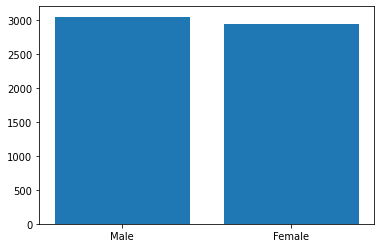

In [33]:
# Look at the distribution in gender 
plt.bar(teledata.gender.unique(),teledata.gender.value_counts());

In [34]:
# Look at the distribution in gender 
teledata["InternetService"].value_counts()

Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64

<AxesSubplot:title={'center':'Internet Service'}>

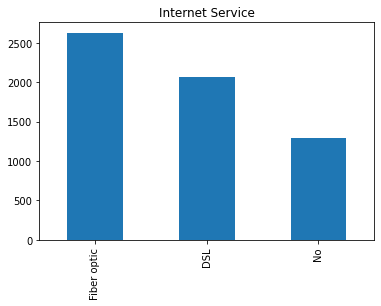

In [35]:
# Make a visualization for each level of internet Service 
teledata["InternetService"].value_counts().plot(kind="bar", title="Internet Service")

<AxesSubplot:title={'center':'Streaming TV services'}>

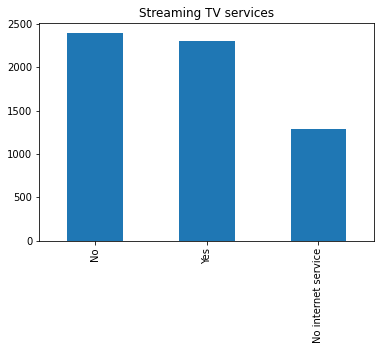

In [36]:
# Make a visualization for each level of streaming TV services 
teledata["StreamingTV"].value_counts().plot(kind="bar", title="Streaming TV services")

<AxesSubplot:xlabel='InternetService', ylabel='count'>

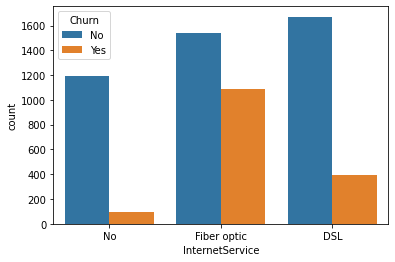

In [37]:
import seaborn as sns
sns.countplot(x=teledata['InternetService'], hue=teledata['Churn'])

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

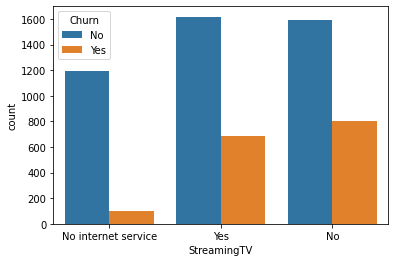

In [38]:
sns.countplot(x=teledata['StreamingTV'], hue=teledata['Churn'])

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

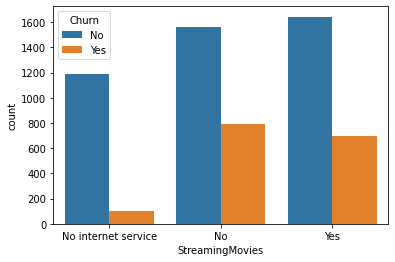

In [39]:
sns.countplot(x=teledata['StreamingMovies'], hue=teledata['Churn'])

<AxesSubplot:xlabel='Contract', ylabel='count'>

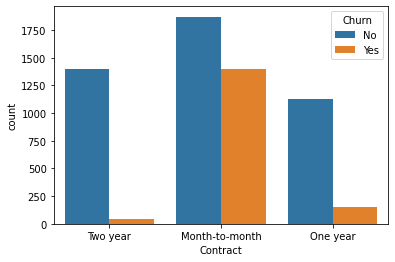

In [40]:
sns.countplot(x=teledata['Contract'], hue=teledata['Churn'])

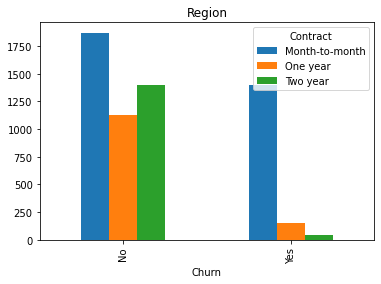

In [41]:
#Create pivot table 
df1 = pd.crosstab(teledata["Churn"], teledata["Contract"])
df1
# Create visualization from the pivot table 
plt.show(df1.plot(kind="bar", title="Region"))

<AxesSubplot:title={'center':'MonthlyCharges'}, xlabel='Churn'>

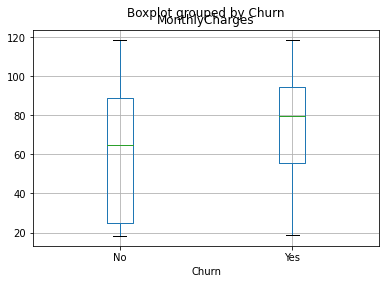

In [42]:
# income and gender 
teledata.boxplot(column='MonthlyCharges', by='Churn')

In [43]:
#Convert TotalCharges to numerical data 
teledata['TotalCharges']=pd.to_numeric(teledata['TotalCharges'],errors='coerce')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

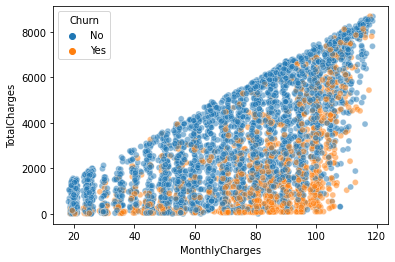

In [44]:
sns.scatterplot(data=teledata, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.5)

<function matplotlib.pyplot.show(close=None, block=None)>

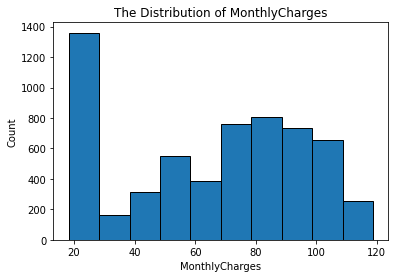

In [45]:
# Creat histograms for MonthlyCharges (non - normalized data)
plt.hist(x = teledata['MonthlyCharges'], bins = 10, edgecolor='black')
plt.xlabel("MonthlyCharges")
plt.ylabel("Count")
plt.title("The Distribution of MonthlyCharges")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

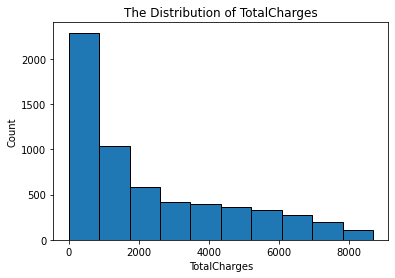

In [46]:
# Creat histograms for TotalCharges (non - normalized data)
plt.hist(x = teledata['TotalCharges'], bins = 10, edgecolor='black')
plt.xlabel("TotalCharges")
plt.ylabel("Count")
plt.title("The Distribution of TotalCharges")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

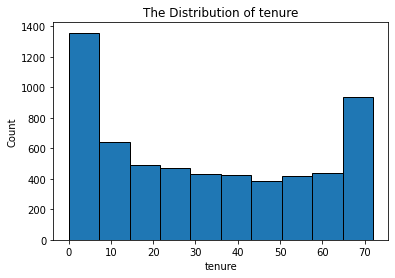

In [47]:
# Creat histograms for tenure (non - normalized data)
plt.hist(x = teledata["tenure"], bins = 10, edgecolor='black')
plt.xlabel("tenure")
plt.ylabel("Count")
plt.title("The Distribution of tenure")
plt.show

[Back_to_top](#The_top)

<a id = "Part4"></a>

### Part 4. Unsupervised Learning and PCA 

<a id = "Part4.1"></a>

#### 4.1 K-means Clustering

In [48]:
import pylab as pl
from sklearn.cluster import KMeans 
from sklearn.datasets import load_boston
import random
boston = load_boston()

In [49]:
#Cosin similarity
def distCosine(vecA,vecB):
    # find the norm of vector
    normA = np.linalg.norm(vecA)
    normB = np.linalg.norm(vecB)
    # compute cosin similarity
    sims = np.dot(vecA,vecB)/(normA * normB)
    # Then, compute the distance 
    dists = 1 - sims
    return dists

In [50]:
#Eucledean distance
def distEuclid(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

In [51]:
#Create a function k- random centroid 
def randCent(dataSet, k):
    n = dataSet.shape[1]
    centroids = np.zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * np.random.rand(k)
    return centroids 

In [52]:
# kMeans function, cosin distance
def kMeans(dataSet, k, distMeas=distCosine, createCent=randCent):
    m = dataSet.shape[0]
    clusterAssment = np.zeros((m,2)) #create mat to assign data points 
                                  #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m): #for each data point assign it to the closest centroid
            minDist = np.inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = np.mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

In [53]:
#Convert labels into numeric
y_train_num = y_train.replace(to_replace=['No', 'Yes'], value=[0, 1])
y_test_num = y_test.replace(to_replace=['No', 'Yes'], value=[0, 1])

In [54]:
kmeans = KMeans(n_clusters=2, max_iter=500, verbose=0)

In [55]:
kmeans.fit(X_train_norm)

KMeans(max_iter=500, n_clusters=2)

In [56]:
clusters = kmeans.predict(X_train_norm)

In [57]:
pd.DataFrame(clusters, columns=["Cluster"])

,Cluster
0,1
1,1
2,0
3,1
4,1
...,...
4783,1
4784,1
4785,1
4786,1


In [58]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(X_train[clusters == c])
    return size

In [59]:
size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  1022
Size of Cluster 1 =  3766


In [60]:
#Compute the Silhouette values for each instance in the data. 
from sklearn import metrics

silhouettes = metrics.silhouette_samples(X_train_norm, clusters)
print(silhouettes[:20])

[0.24372243 0.12754809 0.46100676 0.25503958 0.24682641 0.23088401
 0.4986405  0.20984824 0.17619853 0.23888763 0.23927311 0.19692255
 0.25082245 0.40272626 0.14155194 0.11855031 0.21209045 0.49456265
 0.13020793 0.19782411]


In [61]:
print(silhouettes.mean())

0.2467056680626607


In [62]:
def plot_silhouettes(X_train, clusters, metric='euclidean'):
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(X_train, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

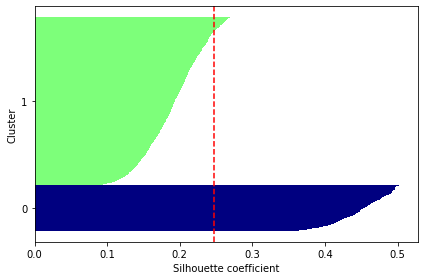

In [63]:
plot_silhouettes(X_train_norm, clusters)

In [64]:
print(clusters)

[1 1 0 ... 1 1 1]


In [65]:
print(y_train_num)

customerID
1820-TQVEV    1
0730-BGQGF    0
7817-OMJNA    0
7278-CKDNC    0
3606-TWKGI    1
             ..
8184-WMOFI    0
3340-QBBFM    0
0378-NHQXU    1
2302-ANTDP    1
1852-XEMDW    0
Name: Churn, Length: 4788, dtype: int64


In [66]:
from sklearn.metrics import completeness_score, homogeneity_score
print("Completeness_score is:",completeness_score(y_train_num,kmeans.labels_))
print("Homogeneity_score is:",homogeneity_score(y_train_num,kmeans.labels_))

Completeness_score is: 0.058626560120314065
Homogeneity_score is: 0.05250907162617151


The Completeness and Homogeneity score are pretty low which indicate that K-mean might not be appropriate for this data set.

[Back_to_top](#The_top)

#### 4.2 PCA 

<a id = "Part4.2"></a>

In [67]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition

In [68]:
scale=StandardScaler()
scale_X_train=scale.fit_transform(X_train)
scale_X_train_df=pd.DataFrame(scale_X_train)
scale_X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-1.275419,0.153308,-0.973749,-0.987546,0.987546,0.436409,-0.436409,0.959066,-0.959066,0.643798,...,-0.805457,0.903924,-0.514775,-0.562235,-0.832148,0.832148,-0.523852,-0.525794,1.393858,-0.54388
1,1.573655,0.843223,1.749961,-0.987546,0.987546,0.436409,-0.436409,-1.042681,1.042681,-1.553283,...,1.241532,-1.106288,-0.514775,1.778617,1.201709,-1.201709,-0.523852,1.901885,-0.717433,-0.54388
2,-0.746305,-1.480876,-0.883445,-0.987546,0.987546,0.436409,-0.436409,0.959066,-0.959066,0.643798,...,-0.805457,-1.106288,1.942596,-0.562235,1.201709,-1.201709,1.908936,-0.525794,-0.717433,-0.54388
3,-0.339295,0.517384,-0.089362,-0.987546,0.987546,-2.291430,2.291430,0.959066,-0.959066,0.643798,...,-0.805457,0.903924,-0.514775,-0.562235,-0.832148,0.832148,-0.523852,-0.525794,1.393858,-0.54388
4,-0.787006,1.395155,-0.406579,-0.987546,0.987546,-2.291430,2.291430,0.959066,-0.959066,0.643798,...,1.241532,0.903924,-0.514775,-0.562235,-0.832148,0.832148,-0.523852,-0.525794,1.393858,-0.54388


In [69]:
X_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
1820-TQVEV,1,69.55,69.55,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
0730-BGQGF,71,90.30,6287.30,0,1,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
7817-OMJNA,14,20.40,275.70,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
7278-CKDNC,24,80.50,2088.45,0,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3606-TWKGI,13,106.90,1364.30,0,1,0,1,1,0,1,...,1,1,0,0,0,1,0,0,1,0


In [70]:
pca=PCA()
pc=pca.fit_transform(scale_X_train)
pc


array([[-1.73056730e+00, -4.24759000e+00, -1.30458530e+00, ...,
         1.79670694e-16,  6.80405653e-16,  4.42496714e-16],
       [-1.09245243e+00,  5.87684653e+00,  1.64710661e+00, ...,
        -3.61877158e-16, -1.25806218e-15,  2.04739799e-15],
       [ 6.43745341e+00, -5.62426791e-01, -4.97934769e-01, ...,
        -2.21875775e-15,  6.17832412e-16, -1.90107509e-16],
       ...,
       [-1.69139849e+00, -3.02126267e-02, -9.42361292e-01, ...,
         4.02795504e-18, -5.69872132e-17, -1.37667141e-17],
       [-2.66337146e+00,  3.27350925e+00, -1.85086897e+00, ...,
        -4.70665876e-17,  2.06320968e-17,  3.88097471e-17],
       [-8.57186155e-01, -8.97884340e-01,  1.31461868e+00, ...,
        -3.44424638e-17,  1.41893615e-16,  2.88964925e-17]])

In [71]:
X_train_df=pd.DataFrame(X_train_norm)
X_test_df=pd.DataFrame(X_test_norm)

In [72]:
from sklearn import decomposition
pca = decomposition.PCA()
DT_trans = pca.fit(X_train_df)

In [73]:
print(pca.explained_variance_ratio_)

[2.32107962e-01 1.35607751e-01 8.39736497e-02 6.08185226e-02
 5.57158846e-02 4.30472598e-02 4.11528241e-02 3.85181650e-02
 3.45393266e-02 3.20019921e-02 3.01629921e-02 2.86935155e-02
 2.64878769e-02 2.47062715e-02 2.41345310e-02 2.36082225e-02
 2.21394266e-02 2.15080425e-02 1.81435642e-02 1.74459917e-02
 4.94322975e-03 5.32611856e-04 1.03869000e-05 4.72493027e-32
 2.35595446e-32 1.60270981e-32 1.20113049e-32 7.92962204e-33
 7.83893380e-33 7.08441371e-33 4.54130195e-33 3.21628624e-33
 2.69904763e-33 1.61112480e-33 1.53715827e-33 1.27798982e-33
 1.27798982e-33 1.27798982e-33 1.27798982e-33 1.27798982e-33
 1.27798982e-33 1.27798982e-33 1.27798982e-33 7.30305903e-34
 3.64543012e-34 4.97132249e-35]


Text(0, 0.5, 'Percentage of Variance (%)')

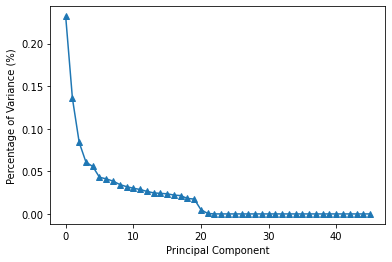

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, marker='^')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance (%)')

In [75]:
pc = 0
total_var = 0
for i in pca.explained_variance_ratio_:
    pc += 1
    total_var += i*100
    print("Variance captured by PC " + str(pc) + ": " + str(total_var))

Variance captured by PC 1: 23.210796161196562
Variance captured by PC 2: 36.77157125370961
Variance captured by PC 3: 45.168936221207204
Variance captured by PC 4: 51.25078847843829
Variance captured by PC 5: 56.82237694244862
Variance captured by PC 6: 61.12710292508231
Variance captured by PC 7: 65.24238533090968
Variance captured by PC 8: 69.09420183389494
Variance captured by PC 9: 72.548134491597
Variance captured by PC 10: 75.74833369915045
Variance captured by PC 11: 78.76463291197328
Variance captured by PC 12: 81.63398446042117
Variance captured by PC 13: 84.28277215032743
Variance captured by PC 14: 86.7533992961684
Variance captured by PC 15: 89.1668523977423
Variance captured by PC 16: 91.52767464771357
Variance captured by PC 17: 93.74161730855039
Variance captured by PC 18: 95.89242155671593
Variance captured by PC 19: 97.70677797869259
Variance captured by PC 20: 99.45137714942875
Variance captured by PC 21: 99.94570012440873
Variance captured by PC 22: 99.9989613100049


In [76]:
#Choose PC12 to capture 81% of variance
from sklearn import decomposition
pca1 = decomposition.PCA(n_components=12)
data_trans = pca1.fit(X_train_df).transform(X_train_df)
print(data_trans)

[[-1.04594269 -1.94609618 -0.30464267 ... -0.00565051  0.10971384
  -0.05958719]
 [-0.02613162  2.68857226  0.95469899 ... -0.4457832   0.09301342
  -0.34131743]
 [ 2.74166525 -0.53206566 -0.29938849 ...  0.1697265  -0.16482952
   0.2617679 ]
 ...
 [-0.77667601  0.19628384 -0.28273321 ... -0.07676406  0.85507713
  -0.60102193]
 [-0.82230791  1.62076368 -0.74209429 ...  0.25987683 -0.89686742
   0.10771336]
 [-0.35419678 -0.30750682  1.07355131 ...  0.11084491  0.35457708
  -1.25142141]]


In [77]:
print(pca1.explained_variance_ratio_)

[0.23210796 0.13560775 0.08397365 0.06081852 0.05571588 0.04304726
 0.04115282 0.03851817 0.03453933 0.03200199 0.03016299 0.02869352]


In [78]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
cat_cols=teledata.select_dtypes(exclude=['int','float']).columns
enc_data=list(cat_cols)
teledata[enc_data]=teledata[enc_data].apply(lambda col:le.fit_transform(col))
teledata[enc_data].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
customerID,,,,,,,,,,,,,,,,,,
7010-BRBUU,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,0
9688-YGXVR,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,0
9286-DOJGF,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,1
6994-KERXL,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,0
2181-UAESM,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,0


In [79]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pc=pca.fit_transform(scale_X_train)
pdf=pd.DataFrame(data=pc,columns=['principal component 1','principal component 2'])
pdf.head()

,principal component 1,principal component 2
0,-1.730567,-4.247589
1,-1.092453,5.876855
2,6.437454,-0.562434
3,-2.779867,-2.426757
4,-3.055484,-0.214295


In [80]:
teledata1 = pd.read_csv('telecom_users.csv')

In [81]:
#teledata1.drop(['customerID','TotalCharges'],axis=1,inplace=True)
#teledata1.head()

In [82]:
teledata1

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [83]:
churn_plot = teledata1['Churn']
churn_plot.head()

0     No
1     No
2    Yes
3     No
4     No
Name: Churn, dtype: object

In [84]:
teledata1=pd.concat([pdf,churn_plot],axis=1)
teledata1.head()

,principal component 1,principal component 2,Churn
0,-1.730567,-4.247589,No
1,-1.092453,5.876855,No
2,6.437454,-0.562434,Yes
3,-2.779867,-2.426757,No
4,-3.055484,-0.214295,No


The plot shows the clustering of churn to see customer retention (customer who renew the contract).

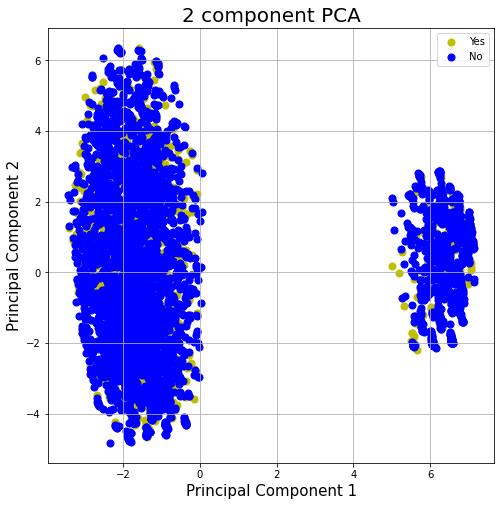

In [85]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Yes','No']
colors = ['y','b']
for target, color in zip(targets,colors):
    indicesToKeep = teledata1['Churn'] == target
    ax.scatter(teledata1.loc[indicesToKeep, 'principal component 1']
               , teledata1.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

[Back_to_top](#The_top)

### Part 5.  Supervised Learning and Classification


<a id = "Part5"></a>

#### 5.1  Naive Bayes 

<a id = "Part5.1"></a>

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [87]:
# Naive Bayes (Gaussian) (cross-validation) , CV=5
nbclf2 = naive_bayes.GaussianNB()
cv_scores = cross_val_score(nbclf2, X_train_norm, y_train, cv=5)
print("Overall Accuracy (cross-validation): %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

# Naive Bayes training accuracy
nbclf_train = nbclf2.fit(X_train, y_train)
print("Accuracy on Training: ", nbclf_train.score(X_train_norm, y_train))

# Naive Bayes testing accuracy
print("Accuracy on Testing: ", nbclf2.score(X_test, y_test))

print("\n")
# Naive Bayes stats
nbclfpred_test3 = nbclf_train.predict(X_test)

print("\n")
print("confusion_matrix: ")
print(confusion_matrix(y_test, nbclfpred_test3))
print("\n")
print(classification_report(y_test, nbclfpred_test3))

Overall Accuracy (cross-validation): 0.69 (+/- 0.03)
Accuracy on Training:  0.6971595655806182
Accuracy on Testing:  0.7078464106844741




confusion_matrix: 
[[586 297]
 [ 53 262]]


              precision    recall  f1-score   support

          No       0.92      0.66      0.77       883
         Yes       0.47      0.83      0.60       315

    accuracy                           0.71      1198
   macro avg       0.69      0.75      0.68      1198
weighted avg       0.80      0.71      0.73      1198



[Back_to_top](#The_top)

#### 5.2 KNN classifier

<a id = "Part5.2"></a>

In [88]:
# k-nn function
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

In [89]:
#Import classification libraries

from sklearn import neighbors, tree, naive_bayes
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(X_train_norm, y_train_num)

KNeighborsClassifier(weights='distance')

In [90]:
# Next, we call the predict function on the test intances to produce 
#the predicted classes.
knnpreds_test = knnclf.predict(X_test_norm)

In [91]:
print (knnpreds_test[0:10])

[0 0 1 0 0 0 0 0 0 1]


In [92]:
#Then, experiment with different values of K and the weight parameter 
from sklearn import neighbors
from sklearn.metrics import classification_report

for k in range(1,40):
    knnclf = neighbors.KNeighborsClassifier(k, weights='distance')
    knnclf.fit(X_train_norm, y_train_num)
    knnpreds_test = knnclf.predict(X_test_norm)
    print("K =",k)
    print(classification_report(y_test_num,knnpreds_test))
    score_train = knnclf.score(X_train_norm,y_train_num)
    score_test = knnclf.score(X_test_norm,y_test_num)
    print('Train score:{:.3f}  Test score:{:.3f}'.format(score_train,score_test))
    print('\n')
    

K = 1
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       883
           1       0.42      0.43      0.43       315

    accuracy                           0.69      1198
   macro avg       0.61      0.61      0.61      1198
weighted avg       0.70      0.69      0.69      1198

Train score:0.999  Test score:0.692


K = 2
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       883
           1       0.42      0.43      0.43       315

    accuracy                           0.69      1198
   macro avg       0.61      0.61      0.61      1198
weighted avg       0.70      0.69      0.69      1198

Train score:0.999  Test score:0.692


K = 3
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       883
           1       0.45      0.43      0.44       315

    accuracy                           0.71      1198
   macro avg       0.63      0.62 

Train score:0.999  Test score:0.752


K = 24
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       883
           1       0.52      0.46      0.49       315

    accuracy                           0.75      1198
   macro avg       0.67      0.66      0.66      1198
weighted avg       0.74      0.75      0.74      1198

Train score:0.999  Test score:0.747


K = 25
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       883
           1       0.53      0.46      0.49       315

    accuracy                           0.75      1198
   macro avg       0.67      0.66      0.66      1198
weighted avg       0.74      0.75      0.74      1198

Train score:0.999  Test score:0.750


K = 26
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       883
           1       0.53      0.47      0.50       315

    accuracy                           0.75    

In [93]:
#Then, generate the confusion matrix
# Best at k = 20
from sklearn.metrics import confusion_matrix

knn13 = neighbors.KNeighborsClassifier(20,weights='distance')
knn13.fit(X_train_norm,y_train_num)
knnpred13 = knn13.predict(X_test_norm)
score_train = knn13.score(X_train_norm,y_train_num)
score_test = knn13.score(X_test_norm,y_test_num)
con_matrix13 = confusion_matrix(y_test_num,knnpred13)
print(con_matrix13)
print("\n")
print(classification_report(y_test_num,knnpred13))
print('Train score:{:.3f}  Test score:{:.3f}'.format(score_train,score_test))

[[751 132]
 [166 149]]


              precision    recall  f1-score   support

           0       0.82      0.85      0.83       883
           1       0.53      0.47      0.50       315

    accuracy                           0.75      1198
   macro avg       0.67      0.66      0.67      1198
weighted avg       0.74      0.75      0.75      1198

Train score:0.999  Test score:0.751


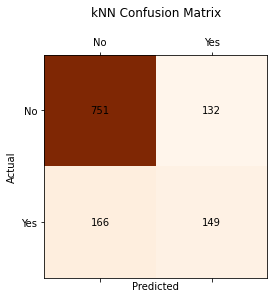

In [94]:
#Visualize the confusion matrix
plt.matshow(con_matrix13, cmap = plt.cm.Oranges)
plt.title("kNN Confusion Matrix\n")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
for y in range(con_matrix13.shape[0]):
    for x in range(con_matrix13.shape[1]):
        plt.text(x, y, '{}'.format(con_matrix13[y,x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

From above analysis, we can see for KNN classification, the accuracy is 0.751, the recall is 0.47.

[Back_to_top](#The_top)

#### 5.3 Decision Tree

<a id = "Part5.3"></a>

In [95]:
# Train the decision tree on the training data
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_train, y_train)

In [96]:
# Measure performance function

from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print ("Confussion matrix")
        print (metrics.confusion_matrix(y, y_pred),"\n")

In [97]:
# Measure performance on test dataset
measure_performance(X_test, y_test, dt, show_confussion_matrix=True, show_classification_report=True)

Accuracy:0.710 

Classification report
              precision    recall  f1-score   support

          No       0.80      0.80      0.80       883
         Yes       0.45      0.45      0.45       315

    accuracy                           0.71      1198
   macro avg       0.63      0.63      0.63      1198
weighted avg       0.71      0.71      0.71      1198
 

Confussion matrix
[[708 175]
 [172 143]] 



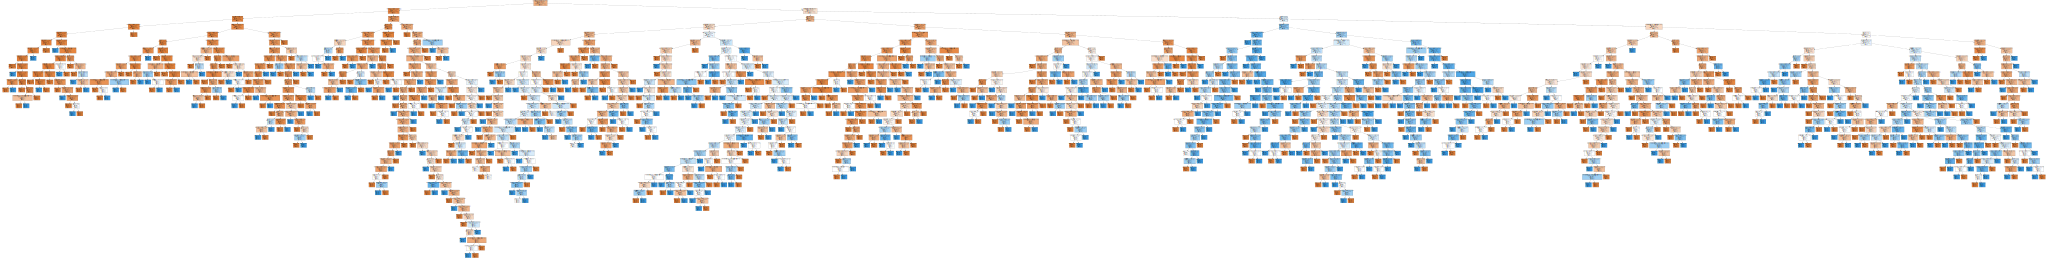

In [98]:
# Tree visualization
import graphviz
from sklearn.tree import export_graphviz 

export_graphviz(dt,out_file='tree.dot', feature_names=tele_data.columns, class_names=["No","Yes"],filled = True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### Optimize the decision tree - Feature Selection:
Conclusion: feature number = 32 provides the best accuracy

1 0.641406434255466
6 0.7111538159170517
11 0.7245189158026223
16 0.7293232064709427
21 0.7314087053746909
26 0.7353783597278152
31 0.7347503079113564
36 0.7303644272848768
41 0.733289803548187
46 0.7322455254583731
51 0.7366331530996411
56 0.7372603314087053
61 0.7399743188826093
66 0.7399756291437007
71 0.7412295490081323
76 0.7391418663358985
81 0.7355910587783125
86 0.7368445418890471
91 0.7391414295822014
96 0.7401865811794097
14
Optimal percentile of features:71 

Optimal number of features:32 



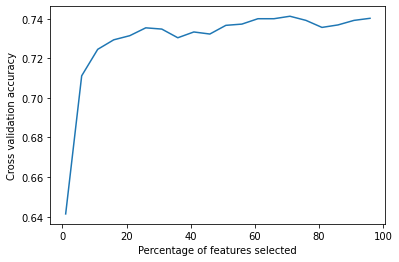

In [99]:
from sklearn import feature_selection
from sklearn import model_selection

dt = tree.DecisionTreeClassifier(criterion='entropy', random_state=17)

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = model_selection.cross_val_score(dt, X_train_fs, y_train, cv=10)
    print (i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.max())[0]
print(optimal_percentile[0])
print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentile[0]]), "\n")
optimal_num_features = int(percentiles[optimal_percentile[0]]*len(tele_data.columns)/100)
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

In [100]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [101]:
# Evaluate the best number of features on the test set
fs = feature_selection.SelectKBest(feature_selection.chi2, optimal_num_features)
X_train_fs = fs.fit_transform(X_train, y_train)
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.715 



In [102]:
print (dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [103]:
dt.fit(X_train_norm, y_train)
dt.feature_importances_

array([0.12093679, 0.21404109, 0.18839369, 0.01135169, 0.01502904,
       0.00961368, 0.00992231, 0.01177351, 0.00758704, 0.00728827,
       0.00937055, 0.00118771, 0.0024866 , 0.01062757, 0.00069148,
       0.00710165, 0.        , 0.03264468, 0.        , 0.01210236,
       0.        , 0.00547843, 0.01290618, 0.        , 0.00702555,
       0.00561291, 0.        , 0.00905025, 0.00796475, 0.        ,
       0.01035644, 0.00280366, 0.        , 0.00906413, 0.00296875,
       0.        , 0.00777621, 0.16081943, 0.00442238, 0.00488587,
       0.016042  , 0.01166646, 0.00787846, 0.01069981, 0.01665083,
       0.01377778])

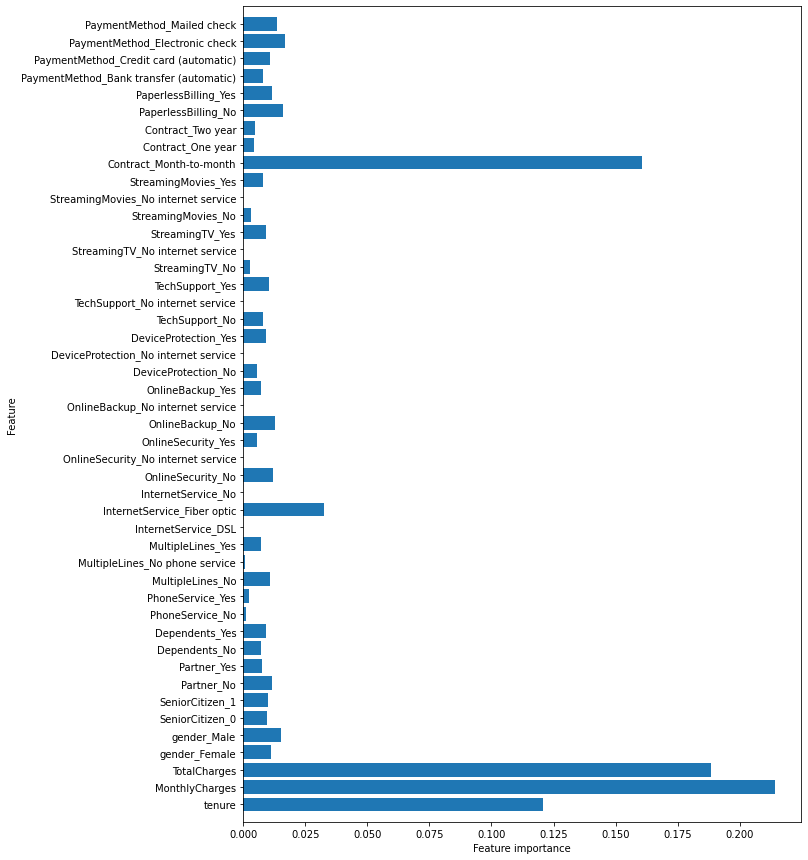

In [104]:
def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

fig, ax = plt.subplots(figsize=(10,15))
features = tele_data.columns.values
plot_feature_importances(dt, len(features), features)

From above we can see Contract_Month_to_month, OnlineSecurity, tenure, MonthlyCharges, InternetService_fiber, TotalCharges and InternetService_DSL are the top important features.

#### Optimize the decision tree - Criterion Selection: Entropy or Gini
Conclusion: 'Entropy' works better than 'Gini'

In [105]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
scores = model_selection.cross_val_score(dt, X_train_fs, y_train, cv=10)
print ("Entropy criterion accuracy on cv: {0:.3f}".format(scores.mean()))
dt = tree.DecisionTreeClassifier(criterion='gini')
scores = model_selection.cross_val_score(dt, X_train_fs, y_train, cv=10)
print ("Gini criterion accuracy on cv: {0:.3f}".format(scores.mean()))

Entropy criterion accuracy on cv: 0.741
Gini criterion accuracy on cv: 0.731


#### Optimize the decision tree -  max_depth, min_samples_leaf selection
Conclusion: max_depth = 5, min_samples_leaf = 23 works best

In [106]:
# general function that performs cross-validation using a range of values for a specified parameter of a model
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print (param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        #cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        cv = KFold(n_splits=K)
        cv.get_n_splits(X) 
        cv = KFold(n_splits=K,random_state=None, shuffle=False)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv.split(X)):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = clf.score([X[k] for k in train], y[train])
            k_test_scores[j] = clf.score([X[k] for k in test], y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [107]:
# optimize max_depth
# create an evenly spaced range of numbers in a specified interval
md = np.linspace(1, 40, 20)
md = np.array([int(e) for e in md])
print (md)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 40]


max_depth  =  1
max_depth  =  3
max_depth  =  5
max_depth  =  7
max_depth  =  9
max_depth  =  11
max_depth  =  13
max_depth  =  15
max_depth  =  17
max_depth  =  19
max_depth  =  21
max_depth  =  23
max_depth  =  25
max_depth  =  27
max_depth  =  29
max_depth  =  31
max_depth  =  33
max_depth  =  35
max_depth  =  37
max_depth  =  40


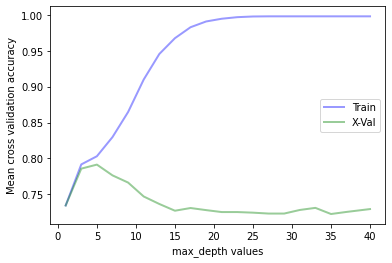

In [108]:
train_scores, test_scores = calc_params(X_train_fs, y_train, dt, md, 'max_depth', 5)

max_depth = 5 works best

min_samples_leaf  =  1
min_samples_leaf  =  3
min_samples_leaf  =  5
min_samples_leaf  =  7
min_samples_leaf  =  9
min_samples_leaf  =  11
min_samples_leaf  =  13
min_samples_leaf  =  15
min_samples_leaf  =  17
min_samples_leaf  =  19
min_samples_leaf  =  21
min_samples_leaf  =  23
min_samples_leaf  =  25
min_samples_leaf  =  27
min_samples_leaf  =  30


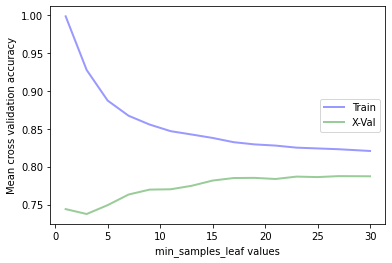

In [109]:
# Optimize min_sample_leaf
msl = np.linspace(1, 30, 15)
msl = np.array([int(e) for e in msl])

dt = tree.DecisionTreeClassifier(criterion='entropy')
train_scores, test_scores = calc_params(X_train_fs, y_train, dt, msl, 'min_samples_leaf', 5)

min_samples_leaf  =  23 is a good choice

#### Evaluate the final Decision Tree with optimized parameters: 

In [110]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.set_params(max_depth=5, min_samples_leaf=23, max_features = 32, random_state=3)
dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=True, show_classification_report=True)

Accuracy:0.782 

Classification report
              precision    recall  f1-score   support

          No       0.84      0.86      0.85       883
         Yes       0.59      0.56      0.57       315

    accuracy                           0.78      1198
   macro avg       0.72      0.71      0.71      1198
weighted avg       0.78      0.78      0.78      1198
 

Confussion matrix
[[762 121]
 [140 175]] 



In [111]:
print (dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 32, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 23, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 3, 'splitter': 'best'}


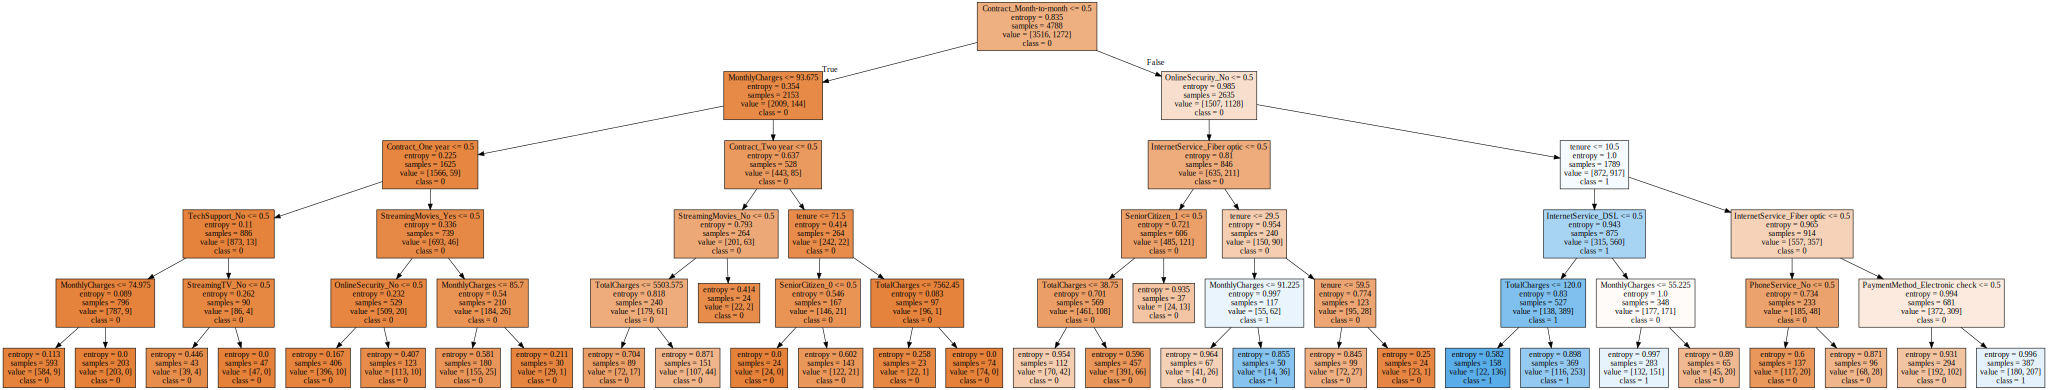

In [112]:
export_graphviz(dt,out_file='tree.dot', feature_names=X_train.columns, class_names=["0","1"], filled = True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [113]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, plot_roc_curve

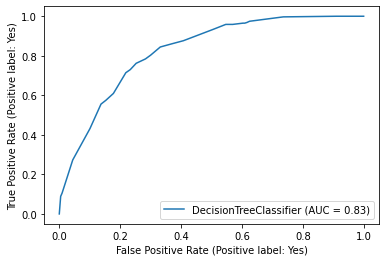

In [114]:
# Compute ROC curve and ROC area
dt_roc = plot_roc_curve(dt, X_test, y_test)
plt.show()

From above analysis, we can see the optimized decision tree improved the accuarcy from 0.717 to 0.782. The recall rate is 0.56. 

[Back_to_top](#The_top)

<a id = "Part5.4"></a>

#### 5.4 Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=33)
rf = rf.fit(X_train, y_train)
measure_performance(X_test, y_test, rf, show_confussion_matrix=True, show_classification_report=True)

Accuracy:0.783 

Classification report
              precision    recall  f1-score   support

          No       0.82      0.90      0.86       883
         Yes       0.62      0.46      0.53       315

    accuracy                           0.78      1198
   macro avg       0.72      0.68      0.69      1198
weighted avg       0.77      0.78      0.77      1198
 

Confussion matrix
[[792  91]
 [169 146]] 



Next do  the Random Forest parameter optimization

In [116]:
msl = range(1,20)
print(msl)

range(1, 20)


min_samples_leaf  =  1
min_samples_leaf  =  2
min_samples_leaf  =  3
min_samples_leaf  =  4
min_samples_leaf  =  5
min_samples_leaf  =  6
min_samples_leaf  =  7
min_samples_leaf  =  8
min_samples_leaf  =  9
min_samples_leaf  =  10
min_samples_leaf  =  11
min_samples_leaf  =  12
min_samples_leaf  =  13
min_samples_leaf  =  14
min_samples_leaf  =  15
min_samples_leaf  =  16
min_samples_leaf  =  17
min_samples_leaf  =  18
min_samples_leaf  =  19


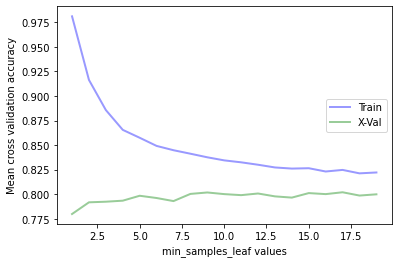

In [117]:
rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, msl, 'min_samples_leaf', 5)

Choose min_sample_leaf = 17

max_depth  =  1
max_depth  =  2
max_depth  =  3
max_depth  =  4
max_depth  =  5
max_depth  =  6
max_depth  =  7
max_depth  =  8


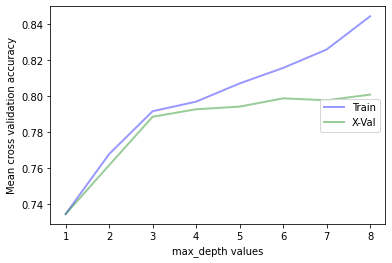

In [118]:
m_depth = [1,2,3,4,5,6,7,8]

rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, m_depth, 'max_depth', 5)

Choose max_depth = 6

In [119]:
nest = range(5, 101, 5)
print(nest)

range(5, 101, 5)


n_estimators  =  5
n_estimators  =  10
n_estimators  =  15
n_estimators  =  20
n_estimators  =  25
n_estimators  =  30
n_estimators  =  35
n_estimators  =  40
n_estimators  =  45
n_estimators  =  50
n_estimators  =  55
n_estimators  =  60
n_estimators  =  65
n_estimators  =  70
n_estimators  =  75
n_estimators  =  80
n_estimators  =  85
n_estimators  =  90
n_estimators  =  95
n_estimators  =  100


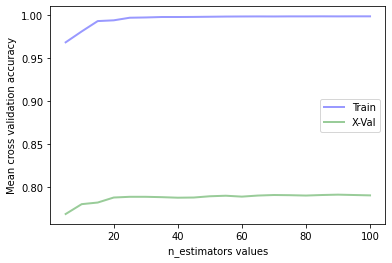

In [120]:
rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, nest, 'n_estimators', 5)

Choose n_estimators = 20

In [121]:
rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=17, max_depth=6, random_state = 33)
rf.fit(X_train, y_train)

measure_performance(X_test, y_test, rf, show_confussion_matrix=True, show_classification_report=True)

Accuracy:0.786 

Classification report
              precision    recall  f1-score   support

          No       0.82      0.91      0.86       883
         Yes       0.64      0.43      0.52       315

    accuracy                           0.79      1198
   macro avg       0.73      0.67      0.69      1198
weighted avg       0.77      0.79      0.77      1198
 

Confussion matrix
[[806  77]
 [179 136]] 



In [122]:
rf.fit(X_train_norm, y_train)
rf.feature_importances_

array([0.15453195, 0.0628561 , 0.10198148, 0.00125011, 0.00414555,
       0.00315624, 0.00377906, 0.00198623, 0.005212  , 0.00193809,
       0.00151424, 0.00101081, 0.00218106, 0.00185397, 0.00077424,
       0.00319468, 0.02240914, 0.08211362, 0.00029983, 0.07568787,
       0.00815593, 0.02474709, 0.01163875, 0.00429609, 0.01154502,
       0.02320226, 0.00974234, 0.00316607, 0.03303637, 0.00900576,
       0.01261667, 0.00179392, 0.00512599, 0.00556068, 0.00384093,
       0.00175582, 0.00473683, 0.1415623 , 0.01467305, 0.06316466,
       0.00387032, 0.00447739, 0.00125215, 0.00445416, 0.05799866,
       0.00270452])

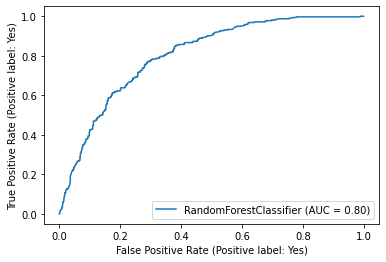

In [123]:
# Compute ROC curve and ROC area
rf_roc = plot_roc_curve(rf, X_test, y_test)
plt.show()

Frpm above we can see the optimized Random Forest  improved accuarcy from 0.783 to 0.786, but the recall is 0.43, not good as decision tree (0.56). This could because the optimization target is increasing accuracy. 

[Back_to_top](#The_top)

#### 5.5 Logistic Regression

<a id = "Part5.5"></a>

In [124]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_norm, y_train)

LogisticRegression(max_iter=1000)

In [125]:
print (logreg.predict(X_test_norm[:10]))

['No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


In [126]:
logreg = LogisticRegression(max_iter=1000, class_weight=None)
logreg.fit(X_train_norm, y_train)
measure_performance(X_test_norm, y_test, logreg, show_confussion_matrix=True, show_classification_report=True)

Accuracy:0.782 

Classification report
              precision    recall  f1-score   support

          No       0.83      0.89      0.86       883
         Yes       0.61      0.49      0.54       315

    accuracy                           0.78      1198
   macro avg       0.72      0.69      0.70      1198
weighted avg       0.77      0.78      0.77      1198
 

Confussion matrix
[[782 101]
 [160 155]] 



Because Logistic Regression requires predictors to be independent, we will perform PCA to see if it can improve the accuarcy. 

In [127]:
# PCA for logistic Regression
from sklearn import decomposition

In [128]:
pca = decomposition.PCA(n_components=20)
pca.fit(X_train_norm)

PCA(n_components=20)

In [129]:
ratio = pca.explained_variance_ratio_
print(ratio)

[0.23210796 0.13560775 0.08397365 0.06081852 0.05571588 0.04304726
 0.04115282 0.03851817 0.03453933 0.03200199 0.03016299 0.02869352
 0.02648788 0.02470627 0.02413453 0.02360822 0.02213943 0.02150804
 0.01814356 0.01744599]


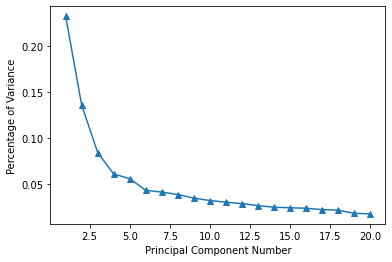

In [130]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 21), ratio[:20], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

If choose >85% virance, we use 14 PCA components

In [131]:
pca = decomposition.PCA(n_components=14)
pcaModel = pca.fit(X_train_norm)

In [132]:
train_pca = pcaModel.transform(X_train_norm)
test_pca = pcaModel.transform(X_test_norm)
train_pca

array([[-1.04594269, -1.94609618, -0.30464267, ..., -0.05958719,
        -0.06808822,  0.12415613],
       [-0.02613162,  2.68857226,  0.95469899, ..., -0.34131743,
        -0.53405609, -0.08897815],
       [ 2.74166525, -0.53206566, -0.29938849, ...,  0.2617679 ,
         0.92731364, -0.00608865],
       ...,
       [-0.77667601,  0.19628384, -0.28273321, ..., -0.60102193,
        -0.35195571,  0.45709975],
       [-0.82230791,  1.62076368, -0.74209429, ...,  0.10771336,
        -1.28355733,  0.48234751],
       [-0.35419678, -0.30750682,  1.07355131, ..., -1.25142141,
        -0.38624433, -0.13350842]])

In [133]:
logreg = LogisticRegression(max_iter=1000,class_weight=None)
logreg.fit(train_pca, y_train)
measure_performance(test_pca, y_test, logreg, show_confussion_matrix=True, show_classification_report=True)

Accuracy:0.775 

Classification report
              precision    recall  f1-score   support

          No       0.82      0.89      0.85       883
         Yes       0.59      0.45      0.51       315

    accuracy                           0.77      1198
   macro avg       0.71      0.67      0.68      1198
weighted avg       0.76      0.77      0.76      1198
 

Confussion matrix
[[785  98]
 [172 143]] 



From above analysis, we can see for the logistic regression, the accuracy is 0.782, the recall is 0.49. The PCA does't improve the accuarcy or recall in this case.  

[Back_to_top](#The_top)

## Part 6.Model accuracy, ROC and precision- recall curve comparison

<a id = "Part6"></a>

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.set_params(max_depth=5, min_samples_leaf=23, max_features = 32, random_state=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=32,
                       min_samples_leaf=23, random_state=3)

In [136]:
knn = knn13.fit(X_train_norm,y_train_num)
nb = nbclf2.fit(X_train_norm, y_train)
dT = dt.fit(X_train_norm, y_train)
rfc = rf.fit(X_train_norm, y_train)
loG = logreg.fit(X_train_norm, y_train)

In [137]:

models = [knn, nb, dT, rfc, loG]
models_names = [ 'KNN', 'Naive Bayes','Decision Tree', 'Random Forest', 'Logistic Regression']

In [138]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

scoring = ['accuracy','precision','recall']
train_accuracy = []
train_precision = []
train_recall = []
train_std = []

train_scoring = {}
for i,model in enumerate (models):
    scores = cross_validate(model, X_train, y_train_num, cv=10, scoring=scoring)
    
    # ignore the first two columns from scoring which are fit_time and score_time
    # pay attention to the breakdown in the Cross validation section  
    train_accuracy.append(scores['test_accuracy'].mean())
    train_precision.append(scores['test_precision'].mean())
    train_recall.append(scores['test_recall'].mean())
    train_std.append(scores['test_accuracy'].std())
    
    train_scoring[i] = scores['test_accuracy']

train_scores = pd.DataFrame(list(zip(train_accuracy,train_precision,train_recall,train_std)),
                            index=models_names,columns=['Accuracy','Precision','Recall','Standard Deviation'])
print('Models Training Scores')
train_scores

Models Training Scores


,Accuracy,Precision,Recall,Standard Deviation
KNN,0.776526,0.628848,0.390748,0.010530
Naive Bayes,0.693609,0.458223,0.837998,0.016664
Decision Tree,0.791144,0.621023,0.557320,0.013960
Random Forest,0.802006,0.698264,0.452787,0.008990
Logistic Regression,0.807436,0.667368,0.551033,0.011535


Text(0, 0.5, 'Accuracy rate')

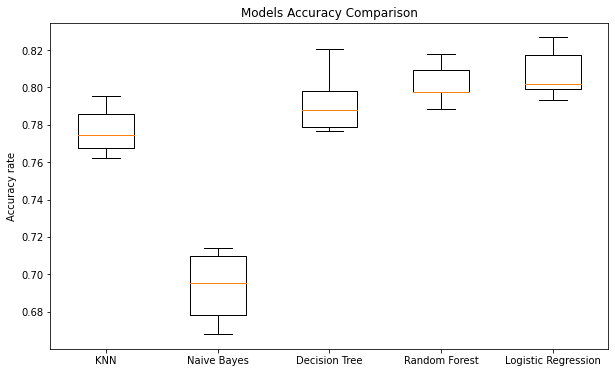

In [139]:
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(train_scoring.values())
ax.set_xticklabels(['KNN', 'Naive Bayes','Decision Tree', 'Random Forest', 'Logistic Regression'])

plt.title('Models Accuracy Comparison')
plt.ylabel('Accuracy rate')

In [140]:
knn1 = knn13.fit(X_train_norm,y_train)
models1 = [knn1, nb, dT, rfc, loG]

In [141]:
accuracy_scores = []
precision_scores = []
recall_scores = []
error_rate = []

for i,model in enumerate (models):
    
    y_pred = model.predict(X_test_norm)
    conf_matrix = confusion_matrix(y_test,y_pred)
    
    
    print('\n')
    print(models_names[i])
    print(classification_report(y_test,y_pred))
    '\n'
    print(conf_matrix)
    
    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    
    total = tn + fp + tp + fn

    accuracy  = (tp + tn) / total # Accuracy Rate
    precision = tp / (tp + fp) # Positive Predictive Value
    recall    = tp / (tp + fn) # True Positive Rate
    error = (fp + fn) / total # Missclassification Rate
 
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    error_rate.append(error)
    
scores_df = pd.DataFrame(list(zip(accuracy_scores,precision_scores,recall_scores,error_rate)),index=models_names,columns=['Accuracy','Precision','Recall','Error Rate'])
print('\n')
print('Models Evaluation from Test Set')
scores_df



KNN
              precision    recall  f1-score   support

          No       0.82      0.85      0.83       883
         Yes       0.53      0.47      0.50       315

    accuracy                           0.75      1198
   macro avg       0.67      0.66      0.67      1198
weighted avg       0.74      0.75      0.75      1198

[[751 132]
 [166 149]]


Naive Bayes
              precision    recall  f1-score   support

          No       0.92      0.66      0.77       883
         Yes       0.47      0.83      0.60       315

    accuracy                           0.71      1198
   macro avg       0.69      0.75      0.68      1198
weighted avg       0.80      0.71      0.73      1198

[[587 296]
 [ 54 261]]


Decision Tree
              precision    recall  f1-score   support

          No       0.84      0.86      0.85       883
         Yes       0.59      0.56      0.57       315

    accuracy                           0.78      1198
   macro avg       0.72      0.71      0.71   

,Accuracy,Precision,Recall,Error Rate
KNN,0.751252,0.530249,0.473016,0.248748
Naive Bayes,0.707846,0.468582,0.828571,0.292154
Decision Tree,0.781302,0.589226,0.555556,0.218698
Random Forest,0.787145,0.641509,0.431746,0.212855
Logistic Regression,0.782137,0.605469,0.492063,0.217863


The performances of classification methods are Naive Bayes 70.8%, KNN 75%, Decision tree 78.1%, Random Forest 78.7%, and Logistic Regression 78.2%. From the result, there are small differences in scores among decision tree, Random Forest, and Logistic Regression. However, the Random forest has the highest score from all classification methods while the Naive Bayes can perform the lowest performance in the model accuracy comparison. KNN performs moderate acuracy and lower accuracy than Decision tree, Ramdom Forest, and Logistic Regression. Furthermore, the scores between train data and set data are similar to each other. It infers that each method can generate real performance. When we look at precision, Random Forest can provide the maximum precision score compared to Algorithms. Additionally, the Naive Bayes has the highest recall score compared to other methods. However, Random Forest has a high score in term of accuracy and precision. Therefore, Random Forest is the best classification model for teledataset to do predictive model for churn customers.

#### ROC and Precision-recall curve

In [142]:
# conver y_test, y_train from yes/no to 1/0 for ROC and precision-recall curve
y_test_01 = pd.get_dummies(y_test)
y_test_yes = y_test_01.iloc[:,1]
y_test_yes

y_train_01 = pd.get_dummies(y_train)
y_train_yes = y_train_01.iloc[:,1]
y_train_yes

customerID
1820-TQVEV    1
0730-BGQGF    0
7817-OMJNA    0
7278-CKDNC    0
3606-TWKGI    1
             ..
8184-WMOFI    0
3340-QBBFM    0
0378-NHQXU    1
2302-ANTDP    1
1852-XEMDW    0
Name: Yes, Length: 4788, dtype: uint8

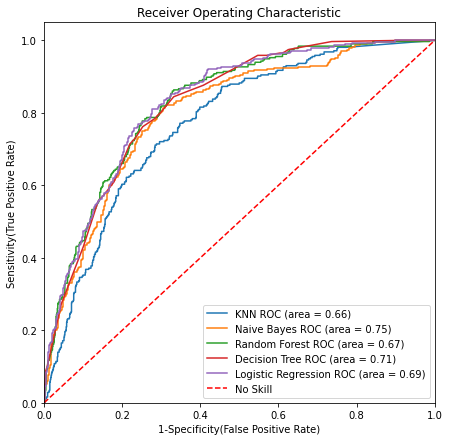

In [143]:
models = [
{
    'label': 'KNN',
    'marker': '+',
    'model': neighbors.KNeighborsClassifier(20, weights='distance')
},  
{
    'label': 'Naive Bayes',
    'marker': '*',
    'model': naive_bayes.GaussianNB()
},    
{
    'label': 'Random Forest',
    'marker': 'o',
    'model': RandomForestClassifier(n_estimators=20, min_samples_leaf=17, max_depth=6, random_state = 33),
},
{
    'label': 'Decision Tree',
    'marker': 'x',
    'model': tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=23, max_features = 32, random_state=3)
},
{
    'label': 'Logistic Regression',
   'marker': '>',
    'model': LogisticRegression(max_iter=1000, class_weight=None)
}
]
# Below for loop iterates through your models list

fig, ax = plt.subplots(figsize=(7,7))

for m in models:
    model = m['model'] # select the model
    model.fit(X_train_norm, y_train_yes) # train the model
    y_pred=model.predict(X_test_norm) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test_yes, model.predict_proba(X_test_norm)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test_yes, model.predict(X_test_norm))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

The ROC chart reflects our analysis result. The Naive Bayes, Decision Tree, Random Forest and Logistic Regression performance are similar. The Naive Bayes ROC area score is the highest. 

In [144]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

Model=KNN Best Threshold=0.996618, F-Score=nan
Model=Naive Bayes Best Threshold=0.994122, F-Score=0.611
Model=Random Forest Best Threshold=0.296850, F-Score=0.627
Model=Decision Tree Best Threshold=0.291667, F-Score=0.617
Model=Logistic Regression Best Threshold=0.291766, F-Score=0.631


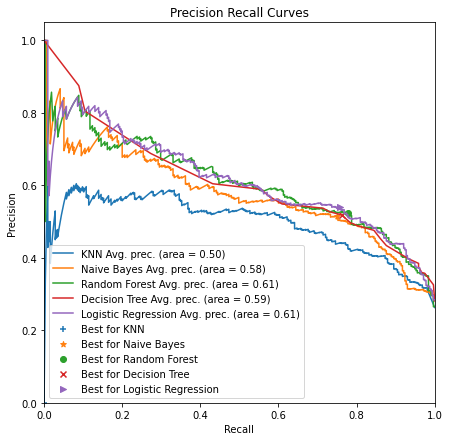

In [145]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

fig, ax = plt.subplots(figsize=(7,7))

for m in models:
    model = m['model'] # select the model
    y_hat = model.predict_proba(X_test_norm)
    #yhat = model.predict_proba(X_test)
    #yhat = yhat[:, 1]
    #print(len(set(y_hat[:,1])))
    #print(y_hat[:,1])
    average_precision = average_precision_score(y_test_yes, y_hat[:,1])
    #disp = plot_precision_recall_curve(model, X_test, y_test)
    #disp.ax_.set_title('Precision-Recall curve: '
    #               'AP={0:0.2f}'.format(average_precision))
    precision, recall, thresholds = precision_recall_curve(y_test_yes, y_hat[:,1])
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print('Model=%s Best Threshold=%f, F-Score=%.3f' % (m['label'],thresholds[ix], fscore[ix]))
    bestlabel = 'Best for ' + m['label']
    plt.plot(recall, precision, label='%s Avg. prec. (area = %0.2f)' % (m['label'], average_precision))
    plt.scatter(recall[ix], precision[ix], marker=m['marker'], label=bestlabel)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curves')
plt.legend(loc="lower left")
plt.show()   # Display

The Precision Recall Curves show that the recall will generally drop when precision increases. The best point for each model is marked in the chart. 

## Part 7. Conclusion

<a id = "Part7"></a>

Regarding the churns, the 'Contract_Month_to_month' is the most important factor. The 'OnlineSecurity', 'tenure', 'MonthlyCharges', 'InternetService_fiber', 'TotalCharges' and 'InternetService_DSL' are the other top important factors. Business can pay attention to these factors. 

From model accuracy perspective, we select Random Forest as the predictive model for churn customers because it provide the highest accuracy and precision. For the scores, it can accurately predict customer retention rate which allows companies to get precise data to use in the business. However,if we want to predict true positive, Naive bayes would be the best technique to use because of a high recall score.

If business want to identify the most churns, we can select the model with highest recall rate which is Naive Beyes. 83% churns are identified and business can take early actions to try to keep these customers. From the precision-recall curve we can see the recall rates drop when precisons increase. If the business needs this information, we can increase recall even at expense of precision by using precision-recall curve. 

### Future work
If we have more time, we would try further evaluation of prediction by using residual plot. Because the dataset is not normally distributed, we also want to explore ensemble techniques by applying bagging and boosting methods to create a strong learner for better performance.


[Back_to_top](#The_top)